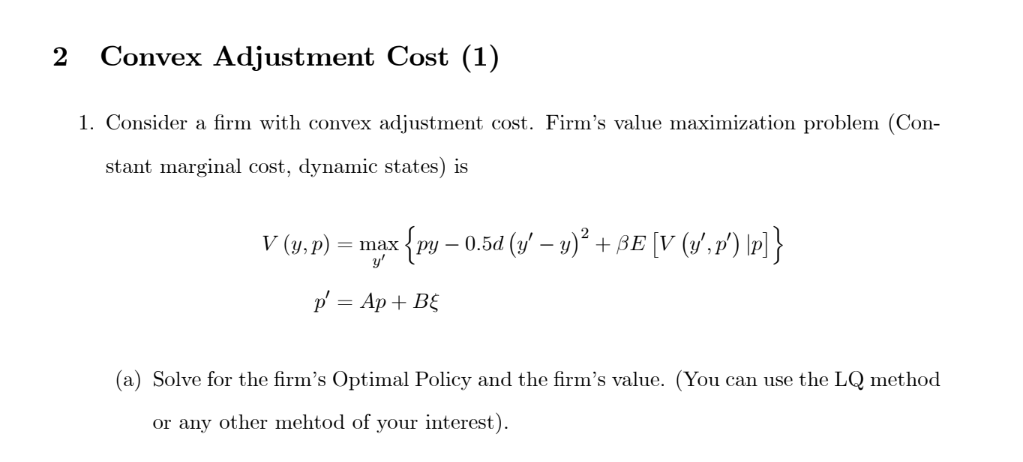

### Solution to the Firm's Value Maximization Problem with Convex Adjustment Cost

Consider a firm with convex adjustment cost. The firm's value maximization problem (constant marginal cost, dynamic states) is given by:
$$ V(y, p) = \max_{y'} \left\{ py - 0.5d(y' - y)^2 + \beta E \left[ V(y', p') | p \right] \right\} $$
$$ p' = Ap + B\zeta $$

### Linear Quadratic Dynamic Programming (LQDP)

The general form of the Linear Quadratic Dynamic Programming problem is:

$$\max_{\{u_t\}} - \mathbb{E} \left\{ \sum_{t=0}^{\infty} \beta^t (x_t' R x_t + u_t' Q u_t + 2 u_t' N x_t) \right\} $$

subject to:

$$ x_{t+1} = Ax_t + Bu_t + C\epsilon_{t+1} $$

where:
- \( x_t \) is \( n \times 1 \)
- \( u_t \) is \( k \times 1 \)
- \( \epsilon_t \) is \( j \times 1 \)
- \( A \) is \( n \times n \)
- \( B \) is \( n \times k \)
- \( C \) is \( n \times j \)

Given that \( \mathbb{E}[\epsilon_t \epsilon_t'] = I \), the problem is equivalent to:

$$ V(x) = \max_u - \left\{ x' R x + u' Q u + 2 u' N x + \beta \mathbb{E} \left[ V(x'') | x \right] \right\} $$

subject to:

$$ x'' = Ax + Bu + C\epsilon $$

### Specific Notation for This Problem

In this problem, we have \( n = 2 \), \( k = 1 \), and \( j = 1 \). We define:

$$x = \begin{pmatrix} y \\ p \end{pmatrix}, \quad u = \begin{pmatrix} y' \end{pmatrix}, \quad \epsilon = \begin{pmatrix} \zeta \end{pmatrix}$$

The state evolution is given by:

$$ p_{t+1} = \tilde{A} p_t + \tilde{B} \zeta$$
$$y_{t+1} = y'$$

This implies:

$$ A = \begin{pmatrix} 0 & 0 \\ 0 & \tilde{A} \end{pmatrix}, \quad B = \begin{pmatrix} 1 \\ 0 \end{pmatrix}, \quad C = \begin{pmatrix} 0 \\ \tilde{B} \end{pmatrix} $$

The cost function transformation is:

$$ py - 0.5d(y' - y)^2 = - \left( x' R x + u' Q u + 2 u' N x \right) $$

yielding:

$$ Q = [0.5d] $$
$$N = \begin{pmatrix} 0.5d & 0 \end{pmatrix} $$
$$ R = \begin{pmatrix} 0.5d & -0.5 \\ -0.5 & 0 \end{pmatrix} $$

### Solving the Bellman Equation

The policy function is \( u = -Fx \) and the value function is \( V(x) = -x' P x - d \) where:

$$ P = R - (\beta B' P A + N)' (Q + \beta B' P B)^{-1} (\beta B' P A + N) + \beta A' P A $$

$$ F = (Q + \beta B' P B)^{-1} (\beta B' P A + N) $$

$$ d = \text{trace}(C' P C) \frac{\beta}{1 - \beta} $$


In [15]:
#packages
import numpy as np
import quantecon as qe

In [ ]:
#initialization

d_tilde = 10
beta = 0.9
A_tilde = 1
B_tilde = 0.5

A = np.array([[0, 0], [0, A_tilde]])
B = np.array([[1], [0]])
C = np.array([[0], [B_tilde]])
Q = np.array([[0.5 * d_tilde]])
N = np.array([[0.5 * d_tilde, 0]])
R = np.array([[0.5 * d_tilde, -0.5], [-0.5, 0]])

max_iterations = 200
epsilon = 1e-9

In [2]:
#Functions
def LQ_Solver(beta, A, B, C, Q, N, R, max_iterations, epsilon):
    P = np.zeros((2, 2))
    dist = 1
    iterations = 0
    
    while dist > epsilon and iterations < max_iterations:
        P_new = R - np.dot(np.dot((beta * np.dot(B.T, np.dot(P, A)) + N).T, np.linalg.inv(Q + beta * np.dot(B.T, np.dot(P, B)))), (beta * np.dot(B.T, np.dot(P, A)) + N)) + beta * np.dot(A.T, np.dot(P, A))
        
        dist = np.linalg.norm(P_new - P)
        P = P_new
        iterations += 1
    
    F = np.dot(np.linalg.inv(Q + beta * np.dot(B.T, np.dot(P, B))), (beta * np.dot(B.T, np.dot(P, A)) + N))
    d = np.trace(np.dot(C.T, np.dot(P, C))) * beta / (1 - beta)
    
    return F, P, d, iterations, dist

def policy_function(y, p, F):
    return -(F[0, 0] * y + F[0, 1] * p)

def value_function(y, p, P, d):
    x = np.array([y, p])
    return -np.dot(x.T, np.dot(P, x)) - d



Optimal policy matrix F:
[[ 1.         -0.04736842]]

Value function matrix P:
[[ 0.         -0.2631579 ]
 [-0.2631579  -0.11218837]]

Constant term d:
-0.25242382268117136

Number of iterations:
195

Final distance:
9.392374358205104e-10


In [ ]:
F, P, d, iterations, dist = LQ_Solver(beta, A, B, C, Q, N, R, max_iterations, epsilon)

In [6]:
#printing outputs
print("Optimal policy matrix F:")
print(F)
print("\nValue function matrix P:")
print(P)
print("\nConstant term d:")
print(d)
print("\nNumber of iterations:")
print(iterations)
print("\nFinal distance:")
print(dist)

Optimal policy matrix F:
[[ 1.         -0.04736842]]

Value function matrix P:
[[ 0.         -0.2631579 ]
 [-0.2631579  -0.11218837]]

Constant term d:
-0.25242382268117136

Number of iterations:
195

Final distance:
9.392374358205104e-10


In [ ]:
y = 1  # Example value for y
p = 1  # Example value for p
optimal_y_prime = policy_function(y, p, F)
value = value_function(y, p, P, d)

In [7]:
print("\nOptimal y':", optimal_y_prime)
print("Value function V(y, p):", value)


Optimal y': -0.9526315788907733
Value function V(y, p): 0.8909279784197653


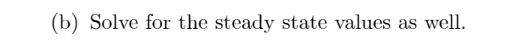

### Steady State

In steady state, we have \( x_{t+1} = x_t = x \) (in expected value). Therefore,

$$
x = Ax + Bu = Ax - BFx \Rightarrow (I + BF - A)x = 0
$$

One steady state value is \( x = 0 \). Other steady states can be found by determining the kernel of \( I + BF - A \). All vectors in the kernel of \( I + BF - A \) are steady state values.


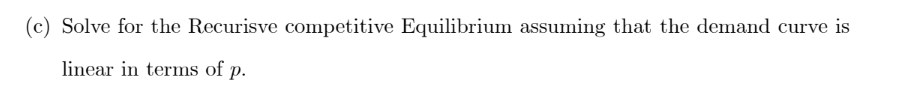


To map a problem into a discounted optimal linear control problem, we need to define


* state vector $x_t$ and control vector $u_t$
* matrices A,B,Q,R that define preferences and the law of motion for the state

For the state and control vectors we choose

$$
\begin{split}
x_t = \begin{bmatrix} y_t \\ Y_t \\ 1 \end{bmatrix},
\qquad
u_t = y_{t+1} - y_{t}
\end{split}
$$
For B,Q,R we set

$$
\begin{split}
A =
\begin{bmatrix}
    1 & 0 & 0 \\
    0 & \kappa_1 & \kappa_0 \\
    0 & 0 & 1
\end{bmatrix},
\quad
B = \begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} ,
\quad
R =
\begin{bmatrix}
    0 & a_1/2 & -a_0/2 \\
    a_1/2 & 0 & 0 \\
    -a_0/2 & 0 & 0
\end{bmatrix},
\quad
Q = \gamma / 2
\end{split}
$$

By multiplying out you can confirm that

* $x_t' R x_t + u_t' Q u_t = - r_t$
* $x_{t+1} = A x_t + B u_t$




This will return an LQ policy F
 with the interpretation $u_t - -Fx_t$
, or $y_{t+1} - y_t = - F_0 y_t - F_1 Y_t - F_2
$
Matching parameters with $y_{t+1} = h_0 + h_1 y_t + h_2 Y_t$
 leads to $h_0 = -F_2, \quad h_1 = 1 - F_0, \quad h_2 = -F_1$
 
 
we used the module lqcontrol.jl to solve the firm’s problem at the stated parameter values but it failed to find a finit solution so we got help form QuantEcon packages for this goal.

In [14]:
# Model parameters
a0 = 100
a1 = 0.05
beta = 0.95
gamma = 10.0

# Beliefs
kappa0 = 95.5
kappa1 = 0.95

# Formulate the LQ problem
A = np.array([
    [1, 0, 0],
    [0, kappa1, kappa0],
    [0, 0, 1]
])

B = np.array([1.0, 0.0, 0.0]).reshape(-1, 1)

R = np.array([
    [0, a1 / 2, -a0 / 2],
    [a1 / 2, 0, 0],
    [-a0 / 2, 0, 0]
])

Q = 0.5 * gamma

# Solve for the optimal policy
lq = qe.LQ(Q, R, A, B, beta=beta)
P, F, d = lq.stationary_values()

# Compute h parameters
h0 = -F[0, 2]
h1 = 1 - F[0, 0]
h2 = -F[0, 1]

# Print results
print("LQ Policy Matrix F:")
print(F)
print(f"\n(h0, h1, h2) = [{h0:.3f}, {h1:.3f}, {h2:.3f}]")

LQ Policy Matrix F:
[[-2.36255460e-15  4.62820513e-02 -9.69487179e+01]]

(h0, h1, h2) = [96.949, 1.000, -0.046]


We can safely conclude:

$$
y_{t+1} = 96.949 + y_t - 0.046 \, Y_t
$$

For the case n>1
, recall that Y_t = n y_t
, which, combined with the previous equation, yields 
$$
Y_{t+1}
= n \left( 96.949 + y_t - 0.046 \, Y_t \right)
= n 96.949 + (1 - n 0.046) Y_t
$$